In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import matplotlib.image as mpimg
import math

pd.set_option("display.max_columns", None)


def get_project_root() -> Path:
    current = Path(__file__).resolve() if "__file__" in globals() else Path().resolve()
    for parent in [current] + list(current.parents):
        if (parent / ".git").exists():
            return parent
    raise RuntimeError("Project root not found")


PROJECT_ROOT = get_project_root()
RESULT_DIR = PROJECT_ROOT / "artifacts" / "figures"

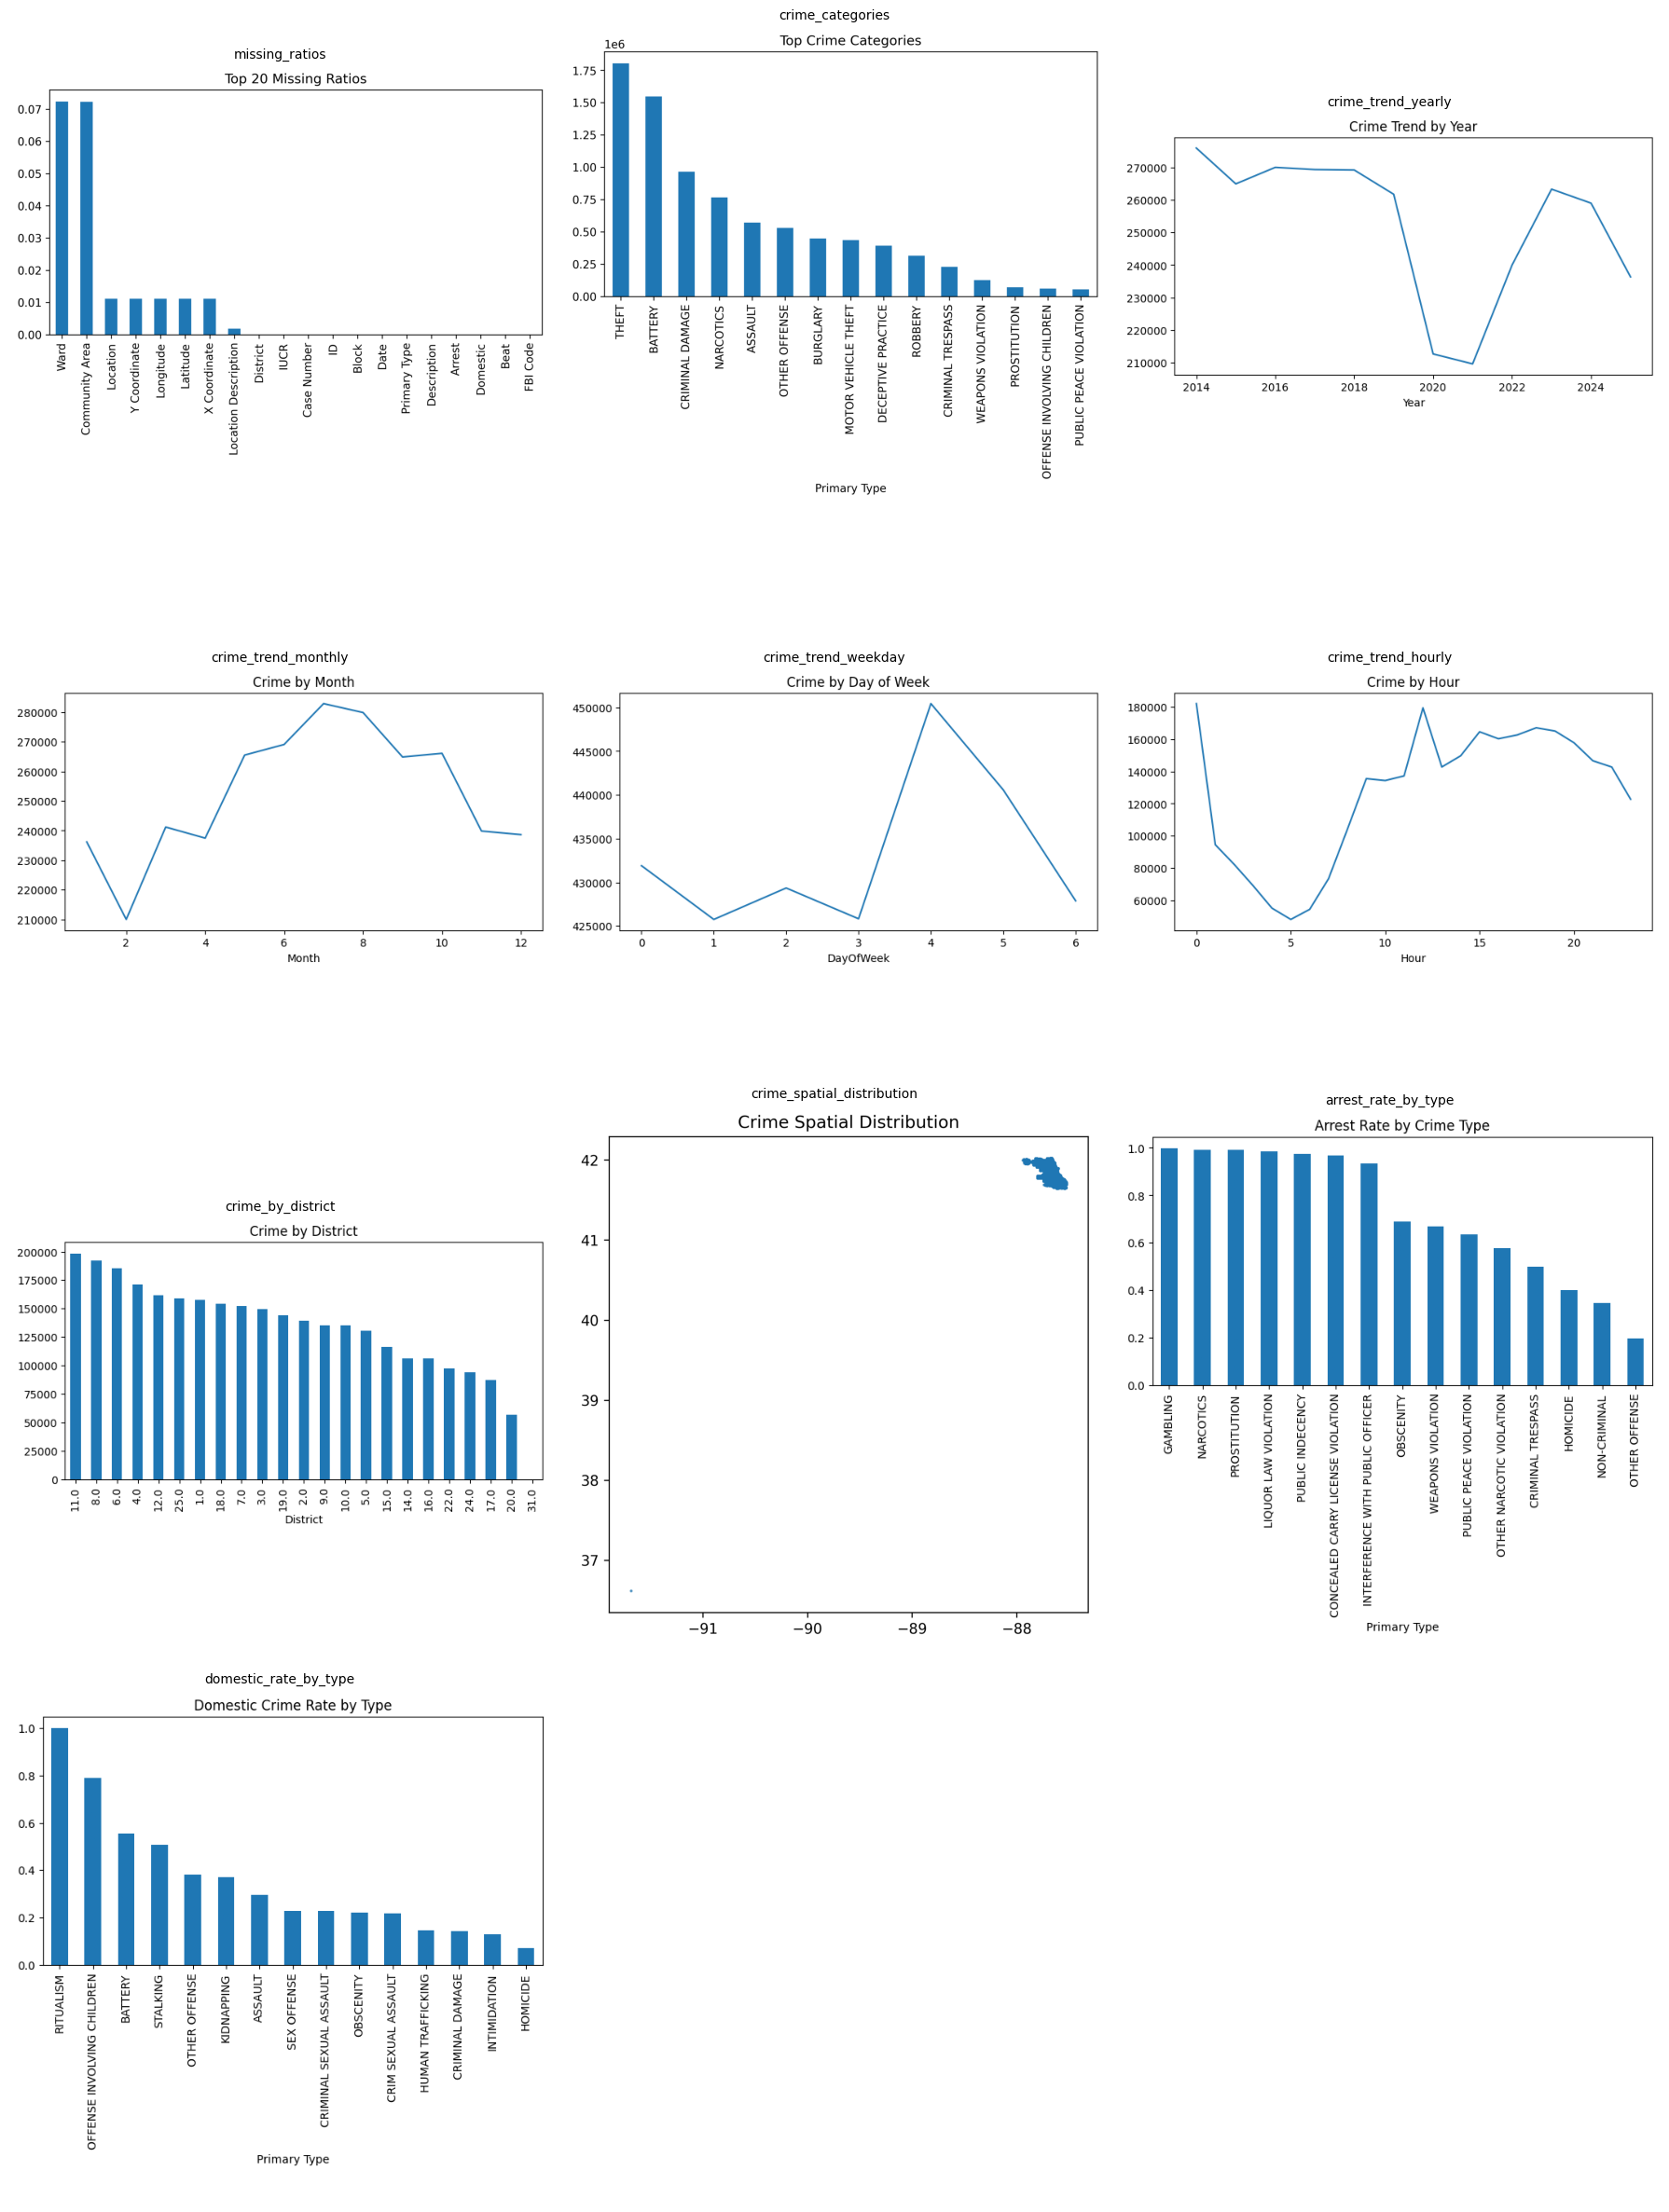

In [ ]:
ordered_files = [
    "missing_ratios.png",
    "crime_categories.png",
    "crime_trend_yearly.png",
    "crime_trend_monthly.png",
    "crime_trend_weekday.png",
    "crime_trend_hourly.png",
    "crime_by_district.png",
    "crime_spatial_distribution.png",
    "arrest_rate_by_type.png",
    "domestic_rate_by_type.png"
]

image_files = [f for f in ordered_files if os.path.exists(RESULT_DIR / f)]

n_images = len(image_files)

if n_images == 0:
    print("No images found.")
else:
    cols = 3  
    rows = math.ceil(n_images / cols) 

    fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
    axes = axes.flatten()

    for i, img_path in enumerate(image_files):
        img = mpimg.imread(RESULT_DIR / img_path)
        axes[i].imshow(img)
        axes[i].set_title(img_path.replace(".png", ""), fontsize=10)
        axes[i].axis("off")

    for i in range(n_images, len(axes)):
        axes[i].axis("off")

    # save the overview grid
    OUTPUT_PATH = PROJECT_ROOT / "artifacts" / "overview_grid.png"
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH, dpi=300, bbox_inches="tight")
    plt.show()